# Walmart Sales Forecasting Dataset - Exploratory and Descriptive Analysis

In this notebook, we perform an extensive exploratory and descriptive analysis of the **Walmart Sales Forecasting Dataset**, which captures weekly sales transactions across multiple Walmart stores and departments. The dataset provides insights into retail sales performance influenced by seasonal trends, promotional markdowns, fuel prices, economic indicators, and holidays.

This stage of analysis aims to understand the underlying sales patterns, detect anomalies, and identify potential drivers of sales variation before building predictive models. We analyze the distribution of key variables such as **Weekly_Sales**, **Temperature**, **Fuel_Price**, **CPI**, and **Unemployment**, and explore how these factors interact with **Store Type**, **Department**, and **Holiday Events**.  

Through descriptive statistics and visualizations, we examine:
- Sales fluctuations across time and store types  
- The impact of holidays and markdowns on revenue  
- Relationships between economic conditions and sales performance  
- Store size and regional differences influencing weekly sales  

By uncovering these patterns, this exploratory analysis lays the foundation for accurate forecasting models and data-driven retail strategies aimed at optimizing Walmart’s operational and promotional planning.


We begin our analysis by importing the core Python libraries required for **data handling**, **numerical computation**, **visualization**, and **directory management**:

- `pandas`: Enables efficient manipulation, filtering, and aggregation of structured tabular data, forming the backbone of our analysis pipeline.

- `numpy`: Provides support for fast numerical operations, array-based computation, and statistical routines.

- `os`: Facilitates interaction with the file system, allowing us to construct flexible and portable directory paths for data and output management.

- `plotly.express`: A high-level graphing library that enables the creation of interactive, publication-quality visualizations, which we use extensively to uncover patterns and present insights throughout the notebook.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#    Step 2: Load and Explore Walmart Sales Forecasting Dataset


We load the cleaned Walmart SaleForecating s Dataset from the local CSV file into a Pandas DataFrame. The `head()` function displays the first few records, giving an overview of important columns such as Store, Date, Dept, Weekly_Sales, Temperature, Fuel_Price, and more. This step ensures the dataset is properly loaded and ready for analysis.


In [4]:
# Load the dataset (change the file name if needed)
walmart_df = pd.read_csv("walmart_cleaned.csv")

# Convert Date to datetime format
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], errors='coerce')

# Drop missing dates
walmart_df = walmart_df.dropna(subset=['Date'])

# Display the first few rows
walmart_df.head()


,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [33]:
walmart_df.shape

(421570, 18)

In [34]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    421570 non-null  int64         
 1   Store         421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   IsHoliday     421570 non-null  int64         
 4   Dept          421570 non-null  float64       
 5   Weekly_Sales  421570 non-null  float64       
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  Type          421

In [36]:
walmart_df.isnull().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
YearMonth       0
dtype: int64

## STEP 2. Aggregating Weekly Sales into Monthly Totals

To analyze trends over time, we create a `YearMonth` column derived from the `Date` column. This allows us to aggregate weekly sales into monthly totals. The resulting `monthly_sales` DataFrame shows the total sales for each month, providing a clearer view of sales trends across the entire period.


In [5]:
# Create a Year-Month column
walmart_df['YearMonth'] = walmart_df['Date'].dt.to_period('M').dt.to_timestamp()

# Aggregate weekly sales into monthly totals
monthly_sales = walmart_df.groupby('YearMonth')['Weekly_Sales'].sum().reset_index()

# Display first rows of monthly data
monthly_sales.head()


,YearMonth,Weekly_Sales
0,2010-02-01,1.903330e+08
1,2010-03-01,1.819198e+08
2,2010-04-01,2.314124e+08
3,2010-05-01,1.867109e+08
4,2010-06-01,1.922462e+08


## STEP 3. Visualizing Monthly Retail Sales Trend

To better understand sales patterns over time, we plot the aggregated monthly sales using a line chart. This visualization highlights trends, seasonal patterns, and any significant fluctuations in Walmart's retail sales over the observed period.


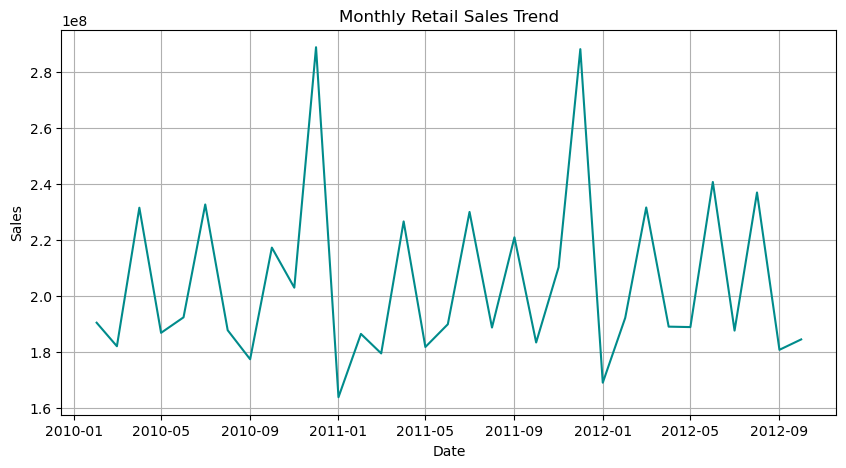

In [13]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Weekly_Sales'], color='darkcyan')
plt.title('Monthly Retail Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


## STEP 5. Calculating and Visualizing Moving Averages

To smooth out short-term fluctuations and highlight longer-term trends, we calculate 3-month and 12-month moving averages of monthly sales. The resulting plot overlays the original monthly sales with these moving averages, making it easier to identify trends and seasonal patterns in Walmart's retail sales.


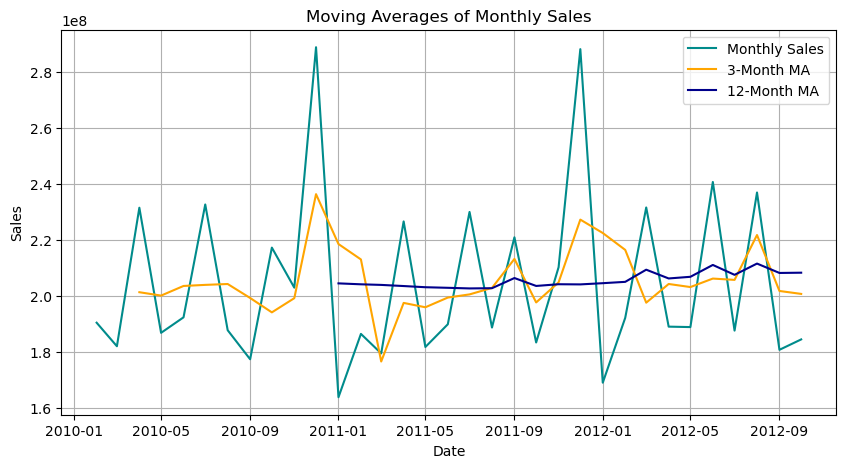

In [15]:
# Calculate moving averages
monthly_sales['MA_3'] = monthly_sales['Weekly_Sales'].rolling(window=3).mean()
monthly_sales['MA_12'] = monthly_sales['Weekly_Sales'].rolling(window=12).mean()

# Plot with moving averages
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Weekly_Sales'], label='Monthly Sales', color='darkcyan')
plt.plot(monthly_sales['YearMonth'], monthly_sales['MA_3'], label='3-Month MA', color='orange')
plt.plot(monthly_sales['YearMonth'], monthly_sales['MA_12'], label='12-Month MA', color='darkblue')
plt.title('Moving Averages of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## STEP 6. Analyzing Seasonal Sales Patterns

To understand how sales vary throughout the year, we extract the month from the `YearMonth` column and calculate the average sales per month. The resulting line chart highlights seasonal patterns, showing which months consistently experience higher or lower sales in Walmart stores.


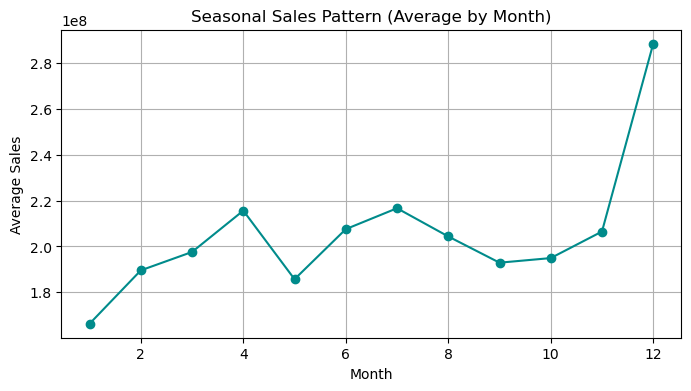

In [16]:
# Extract month from the date
monthly_sales['Month'] = monthly_sales['YearMonth'].dt.month

# Calculate average sales per month
seasonal = monthly_sales.groupby('Month')['Weekly_Sales'].mean()

# Plot seasonality
plt.figure(figsize=(8,4))
plt.plot(seasonal.index, seasonal.values, marker='o', color='darkcyan')
plt.title('Seasonal Sales Pattern (Average by Month)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


## STEP 6. Department-wise Sales Breakdown

To analyze which departments contribute most to Walmart's sales, we group the data by `YearMonth` and `Dept`, then pivot it to create a table of monthly sales per department. We identify the top 5 departments by total sales and visualize their contribution over time using a stacked area chart, highlighting how sales are distributed across key departments.


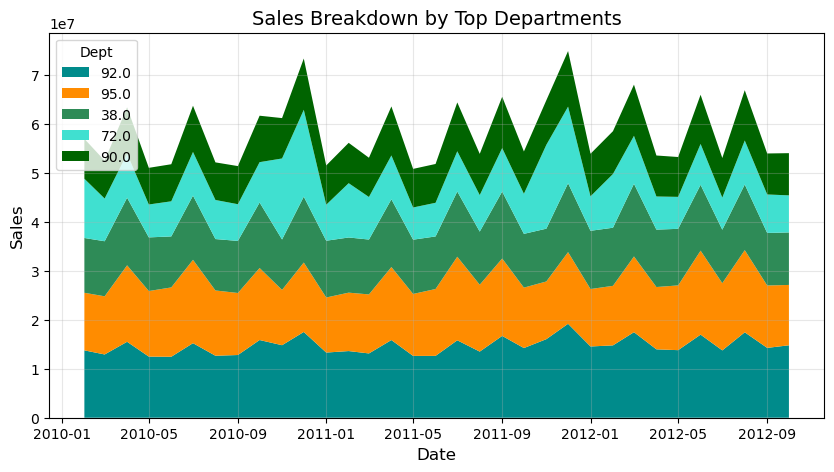

In [32]:
# Group by YearMonth and Department
dept_month = walmart_df.groupby(['YearMonth', 'Dept'])['Weekly_Sales'].sum().reset_index()

# Pivot table for departments
dept_pivot = dept_month.pivot(index='YearMonth', columns='Dept', values='Weekly_Sales').fillna(0)

# Select top 5 departments by total sales
top_depts = dept_pivot.sum().sort_values(ascending=False).head(5).index

# Define the custom color palette
colors = ['#008b8b', 'darkorange', 'seagreen', '#40e0d0', 'darkgreen']

# Plot stacked area chart with custom colors
plt.figure(figsize=(10,5))
plt.stackplot(dept_pivot.index, [dept_pivot[d] for d in top_depts], labels=top_depts, colors=colors)
plt.title('Sales Breakdown by Top Departments', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Dept', loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


## STEP 7. Store-wise Sales Breakdown

To understand how individual stores contribute to overall sales, we group the data by `YearMonth` and `Store`, then pivot it to create a table of monthly sales per store. A stacked area chart visualizes the sales distribution across all stores over time, highlighting which stores consistently drive the highest revenue.


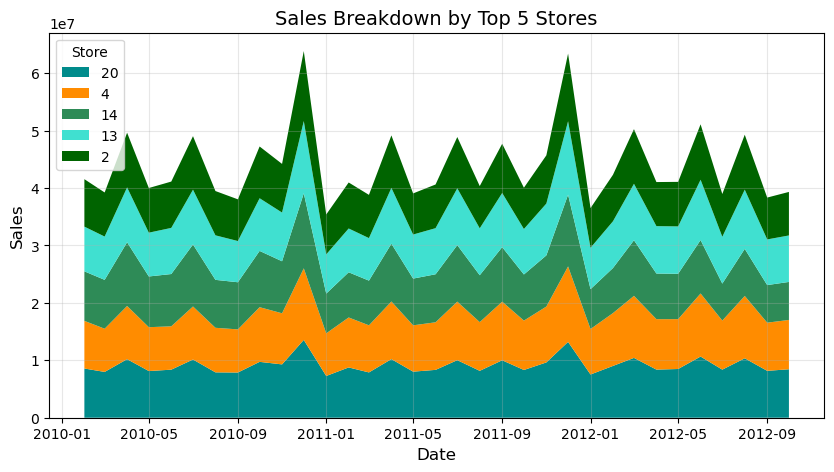

In [30]:
# Select top 5 stores by total sales
top_stores = store_pivot.sum().sort_values(ascending=False).head(5).index
# Define a dark-to-light cyan color palette
colors = ['#008b8b', 'darkorange', 'seagreen', '#40e0d0', 'darkgreen']  
# Plot stacked area chart with dark-to-light cyan colors
plt.figure(figsize=(10,5))
plt.stackplot(store_pivot.index, [store_pivot[s] for s in top_stores], labels=top_stores, colors=colors)
plt.title('Sales Breakdown by Top 5 Stores', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Store', loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()


## STEP 8. Forecasting Monthly Sales for the Next 6 Months

To predict future sales, we use two simple forecasting methods:

1. **Rolling Mean Forecast** – Uses the average of the last 3 months to project sales for the next 6 months.
2. **Simple Exponential Smoothing** – Applies a smoothing factor (`alpha = 0.3`) to give more weight to recent observations.

The resulting plot overlays actual sales with both forecasts, providing a basic projection of upcoming monthly sales trends.


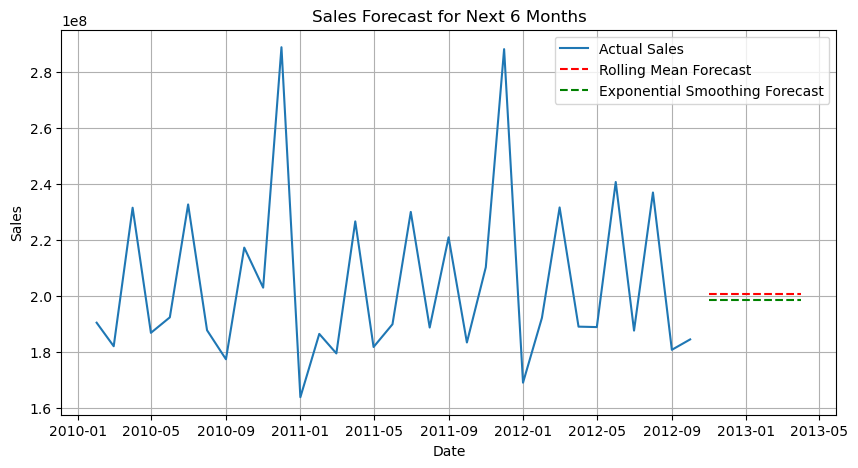

In [12]:
# Rolling mean forecast for next 6 months
last_3_mean = monthly_sales['Weekly_Sales'].tail(3).mean()
future_dates = pd.date_range(start=monthly_sales['YearMonth'].max() + pd.offsets.MonthBegin(1), periods=6, freq='MS')
rolling_forecast = pd.Series([last_3_mean]*6, index=future_dates)

# Simple exponential smoothing forecast
alpha = 0.3
forecast = [monthly_sales['Weekly_Sales'].iloc[0]]
for sale in monthly_sales['Weekly_Sales'][1:]:
    forecast.append(alpha * sale + (1 - alpha) * forecast[-1])
exp_forecast_val = forecast[-1]
exp_forecast = pd.Series([exp_forecast_val]*6, index=future_dates)

# Plot forecasts
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Weekly_Sales'], label='Actual Sales')
plt.plot(rolling_forecast.index, rolling_forecast.values, 'r--', label='Rolling Mean Forecast')
plt.plot(exp_forecast.index, exp_forecast.values, 'g--', label='Exponential Smoothing Forecast')
plt.title('Sales Forecast for Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
